In [212]:
# irrelivant
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [213]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from PIL import ImageDraw, ImageTk, Image

In [214]:
ALPHA = 1e-3

the image below is an image of 8


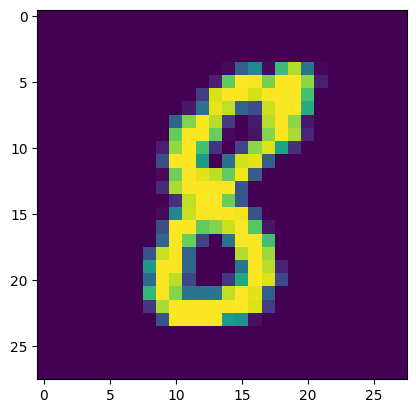

In [215]:
# loading data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train, x_test = x_train /255, x_test /255
y_train, y_test = to_categorical(y_train,num_classes=10), to_categorical(y_test,num_classes=10)
img_dims = x_train[0].shape

# checking data
sample = int(np.random.random() * x_train.shape[0])
plt.imshow(x_train[sample])
print(f"the image below is an image of {np.argmax(y_train[sample])}")

In [216]:
model = Sequential([
  Conv2D(28,(2, 2),input_shape=(28, 28, 1),activation="relu"),
  Conv2D(56, (4,4)),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(64,activation="relu"),
  Dropout(.3),
  Dense(32,activation="relu"),
  Dense(16,activation="relu"),
  Dense(10,activation="softmax")
])

model.compile(
  optimizer=Adam(learning_rate=ALPHA),
  loss=categorical_crossentropy,
  metrics=["accuracy"]
)

In [217]:
model.fit(x_train,y_train,epochs=10)
# print(x_train.shape)
# print(y_train.shape)

Epoch 1/10
1875/1875 [==============================] - 80s 41ms/step - loss: 0.2600 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0997 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0789 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0554 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 79s 42m

In [218]:
results = model.test_on_batch(x_test,y_test,return_dict=True)

print(f"the loss on the testing set is: "+ str(results["loss"]))
print(f"the accuracy of the testing set is: " + str(results["accuracy"]))

the loss on the testing set is: 0.05025728791952133
the accuracy of the testing set is: 0.986299991607666


In [223]:
import tkinter as tk
from tkinter.colorchooser import askcolor
# from tkinter import askcolor

def start_drawing(event):
    global is_drawing, prev_x, prev_y
    is_drawing = True
    
    prev_x, prev_y = event.x, event.y
# lines
def draw(event):
    global is_drawing, prev_x, prev_y
    if is_drawing:
        current_x, current_y = event.x, event.y
        lines.append(canvas.create_line(prev_x, prev_y, current_x, current_y, fill=drawing_color, width=line_width, capstyle=tk.ROUND, smooth=True))
        prev_x, prev_y = current_x, current_y

def stop_drawing(event):
    global is_drawing
    is_drawing = False

def predict_number():
    image = Image.new("RGB", (canvas.winfo_width(), canvas.winfo_height()), "black")
    draw = ImageDraw.Draw(image)
    # Draw the lines onto the image
    global lines
    for line in lines:
        print(canvas.coords(line))
        x1, y1, x2, y2 = canvas.coords(line)
        draw.line((x1, y1, x2, y2), fill=drawing_color, width=line_width,joint="curve")
    lines = []
    image_gray = image.convert("L")
    image_rescaled = image_gray.resize((28,28))
    image_array = np.expand_dims(image_rescaled,axis=0)
    prediction = model.predict(image_array)
    label = prediction.argmax()
    propability = prediction.max()
    prediction_label.config(text=f"you have drawn a {label} with confidence of {propability*100}%")

root = tk.Tk()
root.title("Digit guesser")

canvas = tk.Canvas(root, bg="black")
canvas.pack(fill="both", expand=True)

is_drawing = False
drawing_color = "white"
line_width = 32
lines = []

root.geometry("420x420")

# Create a frame to hold the controls in the same line
controls_frame = tk.Frame(root)
controls_frame.pack(side="top", fill="x")

clear_button = tk.Button(controls_frame, text="Clear Canvas", command=lambda: canvas.delete("all"))

prediction_label = tk.Label(root,text="draw a digit (0-9)")

clear_button.pack(side="left", padx=5, pady=5)

prediction_label.pack(side="top")

clear_button = tk.Button(controls_frame, text="confirm", command=predict_number)
clear_button.pack(side="right", padx=5, pady=5)
canvas.bind("<Button-1>", start_drawing)
canvas.bind("<B1-Motion>", draw)
canvas.bind("<ButtonRelease-1>", stop_drawing)
root.mainloop()

[106.0, 149.0, 107.0, 144.0]
[107.0, 144.0, 110.0, 135.0]
[110.0, 135.0, 111.0, 129.0]
[111.0, 129.0, 114.0, 124.0]
[114.0, 124.0, 116.0, 119.0]
[116.0, 119.0, 118.0, 115.0]
[118.0, 115.0, 120.0, 114.0]
[120.0, 114.0, 123.0, 110.0]
[123.0, 110.0, 126.0, 108.0]
[126.0, 108.0, 128.0, 107.0]
[128.0, 107.0, 132.0, 106.0]
[132.0, 106.0, 134.0, 104.0]
[134.0, 104.0, 136.0, 102.0]
[136.0, 102.0, 138.0, 101.0]
[138.0, 101.0, 142.0, 99.0]
[142.0, 99.0, 144.0, 99.0]
[144.0, 99.0, 149.0, 97.0]
[149.0, 97.0, 155.0, 94.0]
[155.0, 94.0, 160.0, 92.0]
[160.0, 92.0, 166.0, 91.0]
[166.0, 91.0, 170.0, 89.0]
[170.0, 89.0, 175.0, 88.0]
[175.0, 88.0, 178.0, 87.0]
[178.0, 87.0, 182.0, 87.0]
[182.0, 87.0, 186.0, 85.0]
[186.0, 85.0, 188.0, 84.0]
[188.0, 84.0, 191.0, 84.0]
[191.0, 84.0, 194.0, 84.0]
[194.0, 84.0, 195.0, 84.0]
[195.0, 84.0, 198.0, 84.0]
[198.0, 84.0, 201.0, 84.0]
[201.0, 84.0, 203.0, 86.0]
[203.0, 86.0, 205.0, 87.0]
[205.0, 87.0, 206.0, 88.0]
[206.0, 88.0, 209.0, 90.0]
[209.0, 90.0, 211.0, 91.0]